# Predicting Employee retention with Binary Classification

### EDA to figure out which variable has direct impact on employee retention

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading CSV file
data = pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\NPTEL\Datasets\HR_comma_sep.csv")

In [4]:
# Exploring dataframe
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Column names
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Number of rows and columns
data.shape

(14999, 10)

In [7]:
# Number of null values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
# Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [99]:
# Count of number of emplyees who stayed and left the company 
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [100]:
# Column names
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

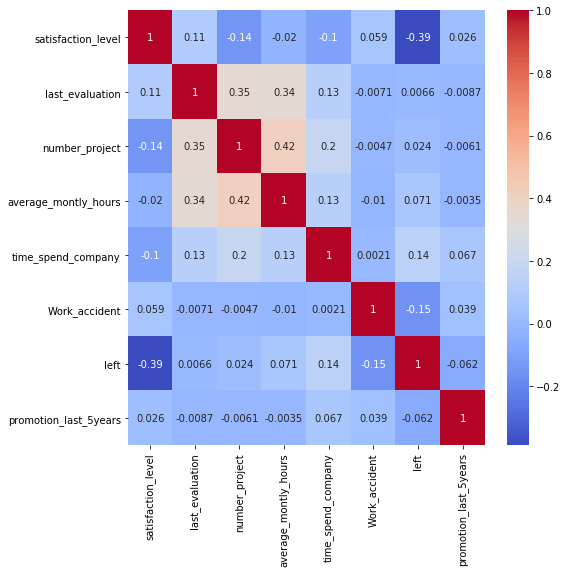

In [13]:
# Person Coorelation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot = True, cmap="coolwarm")

In [41]:
# Pivot and Mean of all numeric vairables  
data.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#### Conclusions:

- Mean level of satisfaction is found to be low for the people who have left the organization.
- Average monthly hours spent and the time spent at the company by the employees have left the company have been more when compared to the employees who are still working.
- Employees who have not received any promotion in the last 5 years are more likely to leave the organization. 
- Since the "last_evaluation", "number_project" and "Work_accident" does not have a big impact, we can ignore these features. 

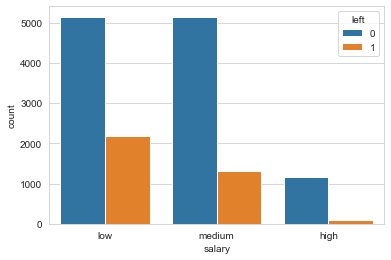

In [43]:
# Impact of salary on employee retention
sns.countplot(x="salary",hue="left",data=data)

#### Conclusion:
    
From the above graph it is clear that employees leaving the company is more when the salary is low or medium.

In [44]:
# Checking
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


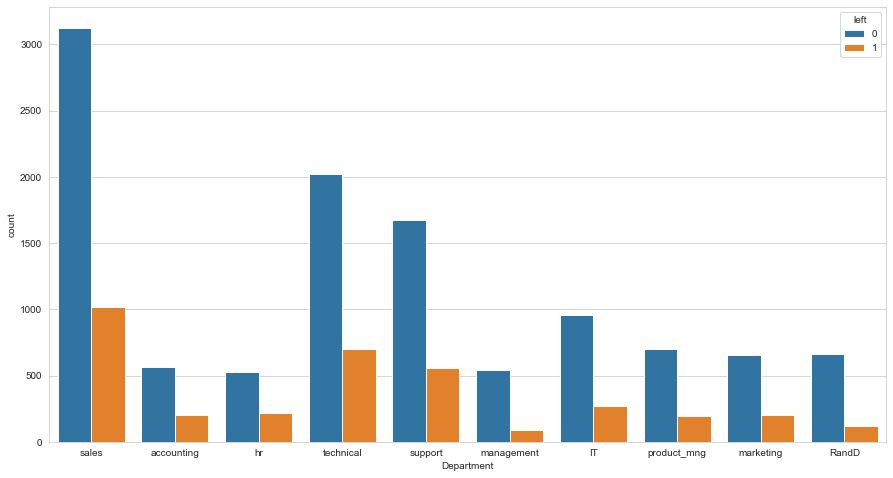

In [47]:
# Impact of department on employee retention
plt.figure(figsize=(15,8))
sns.countplot(x="Department",hue="left",data=data)

#### Conclusion:
    
It is clear that every department has people who leave the company and it is observed that the impact is not too big. Hence, we shall ignore this feature.

In [50]:
# Creating a seperate dataframe for independent variables
independent_variables = data[["satisfaction_level","average_montly_hours","time_spend_company","promotion_last_5years","salary"]]

### Prediction with the selected features/variables

In [51]:
# Checking
independent_variables.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157,3,0,low
1,0.80,262,6,0,medium
2,0.11,272,4,0,medium
3,0.72,223,5,0,low
4,0.37,159,3,0,low


In [55]:
# One hot encoding for "Salary" column
X = pd.get_dummies(independent_variables, prefix="salary")

In [60]:
# Dependent variable
y = data.left

In [125]:
# Train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [126]:
# Exploring and checking the test dataset
X_test

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
1826,0.10,247,4,0,0,0,1
69,0.43,135,3,0,0,0,1
13856,0.76,180,7,0,0,0,1
9194,0.70,266,2,0,0,1,0
4156,0.74,140,3,0,0,0,1
...,...,...,...,...,...,...,...
535,0.37,156,3,0,0,0,1
14808,0.11,263,4,0,0,1,0
6598,0.66,266,3,0,0,0,1
3031,0.98,134,2,0,0,0,1


In [127]:
# Exploring and checking the train dataset
X_train

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
11307,0.72,243,2,0,0,1,0
3996,0.61,153,3,0,0,0,1
6982,0.74,113,3,0,0,0,1
13078,0.80,173,3,0,0,1,0
3038,0.12,260,5,0,0,0,1
...,...,...,...,...,...,...,...
2497,0.85,106,2,0,0,1,0
14269,0.38,128,3,0,0,1,0
1151,0.79,234,5,0,0,1,0
7169,0.21,208,5,0,0,1,0


In [128]:
# Creating a prediction model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [129]:
# Fitting the model 
model.fit(X_train,y_train)

C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
# Prediction score
model.score(X_test,y_test)

0.7642857142857142

#### Accuracy of the prediction is 76.4%